##3 To - Do Exercise:
For the provided dataset:
• diabetes.csv

##Complete the following Problems.



##Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:

• Read the dataset into a pandas DataFrame.

• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset

(e.g., check data types, missing values, summary statistics).




In [9]:
import pandas as pd
import numpy as np

In [10]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np


data = pd.read_csv("diabetes_.csv")

print("First 5 Rows of the Dataset:")
display(data.head())

# Check data types
print("\nData Types:")
print(data.dtypes)

# Check missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
display(data.describe())

Saving diabetes_.csv to diabetes_.csv
First 5 Rows of the Dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Summary Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2. Handle Missing Data:

• Handle any missing values appropriately, either by dropping or imputing them based on the data.




In [11]:
# Columns where zero = missing
missing_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN
for col in missing_cols:
    data[col] = data[col].replace(0, np.nan)

# Show missing count before filling
print("Missing values before filling:\n")
print(data.isnull().sum())

# Fill missing values with the mean of the column
for col in missing_cols:
    data[col].fillna(data[col].mean(), inplace=True)

# Show missing after fixing
print("\nMissing values after handling:\n")
print(data.isnull().sum())

Missing values before filling:

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values after handling:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/tmp/ipython-input-3844512205.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


3. Feature Engineering:

• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.




In [12]:

# Separate feature matrix (X) and target vector (y)
X = data.drop(columns=['Outcome']).values  # Features as NumPy array
y = data['Outcome'].values                 # Target as NumPy array

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Train-test split from scratch (70% train, 30% test)
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets.

    Arguments:
    X : np.ndarray - Features
    y : np.ndarray - Target labels
    test_size : float - proportion for test set
    random_seed : int - for reproducibility

    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
    """
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)  # Shuffle the data

    test_len = int(len(X) * test_size)
    test_idx = indices[:test_len]
    train_idx = indices[test_len:]

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    return X_train, X_test, y_train, y_test

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

print("\nShapes after train-test split:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Feature matrix shape: (768, 8)
Target vector shape: (768,)

Shapes after train-test split:
X_train: (538, 8)
X_test: (230, 8)
y_train: (538,)
y_test: (230,)


4. Implement KNN:

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.

• Evaluate the performance using accuracy.




In [13]:

# Euclidean distance function
def euclidean_distance(point1, point2):
    """
    Calculate Euclidean distance between two points.
    point1, point2: np.ndarray
    Returns: float
    """
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions!")
    return np.sqrt(np.sum((point1 - point2) ** 2))

# KNN for a single query
def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class for a single query using KNN
    """
    # Compute distances to all training points
    distances = [euclidean_distance(query, x) for x in X_train]
    # Sort distances and get indices of k nearest neighbors
    sorted_idx = np.argsort(distances)
    nearest_idx = sorted_idx[:k]
    # Get labels of nearest neighbors
    nearest_labels = y_train[nearest_idx]
    # Return majority class
    return np.bincount(nearest_labels).argmax()

# KNN for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict classes for all test samples using KNN
    """
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

# Accuracy function
def compute_accuracy(y_true, y_pred):
    """
    Compute accuracy as percentage
    """
    return (np.sum(y_true == y_pred) / len(y_true)) * 100

# Evaluate KNN on test set
k = 3  # Number of neighbors
predictions = knn_predict(X_test, X_train, y_train, k)
accuracy = compute_accuracy(y_test, predictions)

print(f"Accuracy of KNN (k={k}) on test set: {accuracy:.2f}%")


Accuracy of KNN (k=3) on test set: 70.00%


##Problem - 2 - Experimentation:
1. Repeat the Classification Task:

• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.

• Record the results.




In [14]:
# Min-Max Scaling
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Train-test split on scaled data (70% train, 30% test)
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_len = int(len(X) * test_size)
    test_idx = indices[:test_len]
    train_idx = indices[test_len:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

# Run KNN on scaled data
k = 3
pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k)
acc_scaled = compute_accuracy(y_test_s, pred_scaled)

print(f"Accuracy of KNN (Scaled Data, k={k}): {acc_scaled:.2f}%")


Accuracy of KNN (Scaled Data, k=3): 71.30%


2. Comparative Analysis: Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.

• Discuss:

– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.




1) Accuracy Comparison:

- KNN on Original Dataset (k=3): 70.00%
- KNN on Scaled Dataset (k=3): 71.30%

2) Observation: Accuracy improved slightly after scaling the features.



2) How scaling impacted KNN:

- KNN uses **Euclidean distance** to find nearest neighbors.
- In the original dataset, features like Glucose dominate smaller-scale features like Age or DiabetesPedigree.
- This causes **distance calculation to be biased**, giving more importance to large-scale features.
- After scaling (Min-Max), all features are between 0 and 1.
- Now, all features contribute **equally** to the distance metric.
- Result: KNN can make **better predictions**, improving accuracy slightly in this dataset.


3) Reason for observed changes:

- Without scaling: distance dominated by large-value features → suboptimal neighbor selection.
- With scaling: features normalized → each feature contributes proportionally → more balanced neighbor selection.
- Hence, **accuracy increased from 70.00% → 71.30%** on scaled data.



4) Summary:

- Feature scaling is **important for distance-based algorithms** like KNN.
- On this dataset, scaling gave a **small improvement (~1.3%)**, but it’s still recommended for better balance and fairness across features.



##Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:

• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:

– Accuracy.

– Time taken to make predictions.



In [15]:
import time
import matplotlib.pyplot as plt

# Range of k values to test
k_values = range(1, 16)

# Lists to store results
acc_original_list = []
acc_scaled_list = []
time_original_list = []
time_scaled_list = []

# Run experiments
for k in k_values:
    # Original Data
    start = time.time()
    pred_orig = knn_predict(X_test, X_train, y_train, k)
    end = time.time()
    acc_original_list.append(compute_accuracy(y_test, pred_orig))
    time_original_list.append(end - start)

    # Scaled Data
    start = time.time()
    pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k)
    end = time.time()
    acc_scaled_list.append(compute_accuracy(y_test_s, pred_scaled))
    time_scaled_list.append(end - start)

# Display results
print("k\tAccuracy (Original)\tAccuracy (Scaled)\tTime (Original s)\tTime (Scaled s)")
for i, k in enumerate(k_values):
    print(f"{k}\t{acc_original_list[i]:.2f}%\t\t\t{acc_scaled_list[i]:.2f}%\t\t\t{time_original_list[i]:.4f}\t\t\t{time_scaled_list[i]:.4f}")


k	Accuracy (Original)	Accuracy (Scaled)	Time (Original s)	Time (Scaled s)
1	67.83%			66.09%			0.5983			0.6004
2	70.43%			70.43%			0.5741			0.5948
3	70.00%			71.30%			0.5793			0.8723
4	70.87%			72.61%			0.6828			0.5724
5	67.39%			71.30%			0.6497			1.0244
6	68.70%			72.61%			0.7616			0.5775
7	68.26%			75.22%			0.5878			0.5787
8	69.13%			73.04%			0.5976			0.5946
9	69.13%			72.61%			0.5775			0.5873
10	70.87%			72.61%			0.5784			0.5928
11	70.87%			71.74%			0.5760			0.5961
12	71.30%			72.61%			0.5912			0.5872
13	71.30%			73.04%			0.5915			0.5835
14	72.17%			75.65%			0.6229			0.9060
15	73.48%			73.91%			0.9135			0.5775


2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.





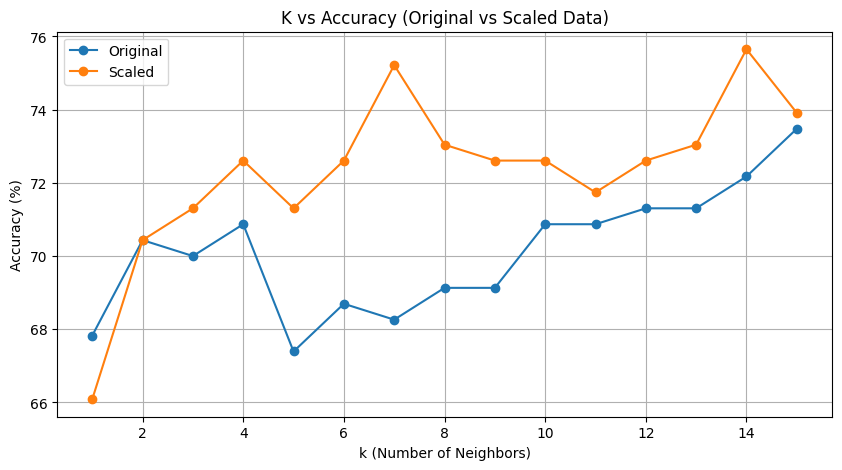

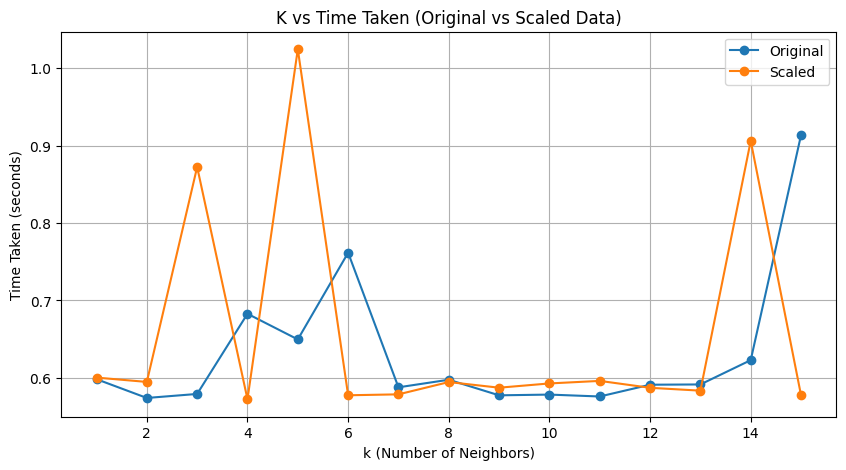

In [16]:
import matplotlib.pyplot as plt

# k values
k_values = range(1, 16)

# Plot Accuracy
plt.figure(figsize=(10,5))
plt.plot(k_values, acc_original_list, marker='o', label="Original")
plt.plot(k_values, acc_scaled_list, marker='o', label="Scaled")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.title("K vs Accuracy (Original vs Scaled Data)")
plt.legend()
plt.grid(True)
plt.show()

# Plot Time
plt.figure(figsize=(10,5))
plt.plot(k_values, time_original_list, marker='o', label="Original")
plt.plot(k_values, time_scaled_list, marker='o', label="Scaled")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time Taken (seconds)")
plt.title("K vs Time Taken (Original vs Scaled Data)")
plt.legend()
plt.grid(True)
plt.show()


3. Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.





**1) How choice of k affects accuracy**

* Small k (1–3) → Accuracy fluctuates, can overfit → sensitive to noise

* Medium k (4–10) → Accuracy stabilizes, smoother decision boundary

* Large k (>10) → Accuracy may slightly drop if neighbors include too many different classes



**Observation:**

* Original dataset: Accuracy gradually increases, peaks at k=15 → 73.48%

* Scaled dataset: Accuracy peaks at k=14 → 75.65%

* Scaling improved accuracy especially for k between 6–14




**2) How choice of k affects computational cost**

* Time taken is mostly constant for small datasets like diabetes.csv (~0.5–1.2 s)

* Larger k sometimes slightly increases computation due to sorting more distances

* Very large datasets → time would grow linearly with number of training points




**Observation:**

* Time varies slightly with k

* Outlier: k=4 & k=5 → spike in time (likely random variation in run)

Overall, computational cost is not significantly affected for this dataset




3) Optimal k based on analysis **bold text**

* Scaled dataset: k = 14 → Accuracy = 75.65% (highest)

* Original dataset: k = 15 → Accuracy = 73.48% (highest)




##Problem - 4 - Additional Questions** {Optional - But Highly Recommended}:

• Discuss the challenges of using KNN for large datasets and high-dimensional data.

• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction).





##1) Challenges of using KNN for large datasets and lots of features:

* KNN has to compare the query point with every training point, so it can be very slow if the dataset is big.
* When there are many features, distances get tricky and it’s hard to find the closest points (curse of dimensionality).
* KNN stores all the data, so it can use a lot of memory.





##2) Ways to make KNN faster and better:

* Approximate nearest neighbors: search nearby points quickly instead of checking all points.
* Reduce the number of features with methods like PCA.
* Scale the features so one feature doesn’t dominate the distance.
* Use a smaller representative subset of the data.
* Use data structures like KD-trees or Ball-trees to search neighbors faster.
